In [11]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [12]:
df_mlp = pd.read_csv("df_3car_tfidf.csv")

In [13]:
df_mlp

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..3-Carene
0,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
1,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42967,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
74996,42970,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
74997,42972,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
74998,42974,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


In [14]:
df_mlp.columns.to_list()

['index',
 'tfidf_0',
 'tfidf_1',
 'tfidf_2',
 'tfidf_3',
 'tfidf_4',
 'tfidf_5',
 'tfidf_6',
 'tfidf_7',
 'tfidf_8',
 'tfidf_9',
 'tfidf_10',
 'tfidf_11',
 'tfidf_12',
 'tfidf_13',
 'tfidf_14',
 'tfidf_15',
 'tfidf_16',
 'tfidf_17',
 'tfidf_18',
 'tfidf_19',
 'tfidf_20',
 'tfidf_21',
 'tfidf_22',
 'tfidf_23',
 'tfidf_24',
 'tfidf_25',
 'tfidf_26',
 'tfidf_27',
 'tfidf_28',
 'tfidf_29',
 'tfidf_30',
 'tfidf_31',
 'tfidf_32',
 'tfidf_33',
 'tfidf_34',
 'tfidf_35',
 'tfidf_36',
 'tfidf_37',
 'tfidf_38',
 'tfidf_39',
 'tfidf_40',
 'tfidf_41',
 'tfidf_42',
 'tfidf_43',
 'tfidf_44',
 'tfidf_45',
 'tfidf_46',
 'tfidf_47',
 'tfidf_48',
 'tfidf_49',
 'tfidf_50',
 'tfidf_51',
 'tfidf_52',
 'tfidf_53',
 'tfidf_54',
 'tfidf_55',
 'tfidf_56',
 'tfidf_57',
 'tfidf_58',
 'tfidf_59',
 'tfidf_60',
 'tfidf_61',
 'tfidf_62',
 'tfidf_63',
 'tfidf_64',
 'tfidf_65',
 'tfidf_66',
 'tfidf_67',
 'tfidf_68',
 'tfidf_69',
 'tfidf_70',
 'tfidf_71',
 'tfidf_72',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_76',

In [15]:
X = df_mlp.drop(['index', 'X..3-Carene'], axis = 1)
y = df_mlp[['X..3-Carene']]

<Axes: ylabel='Count'>

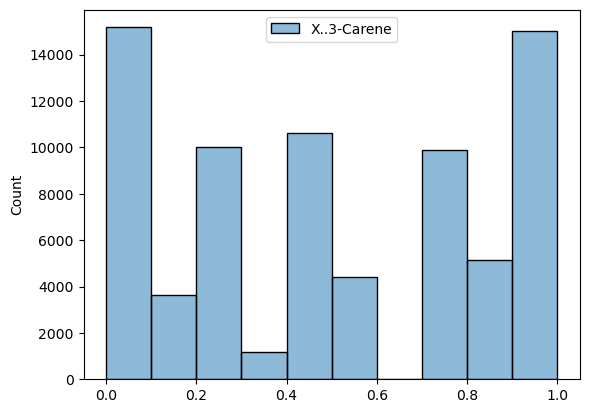

In [16]:
sns.histplot(y, bins = 10)

Train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [18]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [19]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
mean_absolute_error(y_val, y_pred_mlp)

0.03933976970670562

In [21]:
mean_squared_error(y_val, y_pred_mlp)

0.006682239450543448

In [22]:
mean_squared_error(y_val, y_pred_mlp, squared = False)

0.08174496590337198

In [23]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.9884565402768414

In [24]:
#val
r2_score(y_val, y_pred_mlp)

0.9474237140291707

Residual plots for each target variable

Feature Selection

In [25]:
rfreg = RandomForestRegressor()

In [16]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [17]:
selector.estimator_.feature_importances_

array([6.33329478e-04, 5.30563642e-04, 3.29949717e-03, 7.48718557e-04,
       7.54837323e-04, 1.30162294e-03, 1.08552992e-03, 1.47018715e-03,
       2.27797102e-04, 5.20597016e-04, 1.09043889e-04, 2.35670908e-03,
       5.01568687e-04, 1.73146052e-03, 2.72493224e-03, 3.77305958e-04,
       2.44434756e-04, 2.67503074e-03, 2.26325797e-04, 3.24990266e-03,
       6.24002635e-04, 2.11421001e-03, 2.25593053e-03, 2.52137595e-03,
       3.27528857e-04, 1.59682294e-04, 6.70561984e-04, 2.09333877e-04,
       1.62308987e-04, 8.12325797e-04, 3.93076347e-03, 2.86985804e-04,
       6.38388299e-03, 2.03486649e-04, 1.13871020e-03, 1.16167258e-03,
       1.04245618e-03, 1.92895735e-03, 2.32992465e-04, 1.81908379e-03,
       8.30388325e-05, 2.76482398e-04, 8.36797899e-05, 2.76717289e-03,
       2.78182500e-04, 3.35058854e-04, 2.82492859e-03, 2.60930864e-03,
       1.66457203e-03, 2.09107420e-04, 2.38589112e-04, 1.30543563e-04,
       1.99205632e-04, 2.53079727e-03, 5.72452026e-04, 8.11786012e-04,
      

In [18]:
selector.threshold_

0.0021321961620469083

In [19]:
mask = selector.get_support()

In [20]:
mask

array([False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,

In [21]:
selected_features = X.columns[mask]

In [22]:
selected_X = df_mlp[selected_features]
selected_X

,tfidf_2,tfidf_11,tfidf_14,tfidf_17,tfidf_19,tfidf_22,tfidf_23,tfidf_30,tfidf_32,tfidf_43,...,talkative,uplifted,cheese,diesel,earthy,grape,lemon,lime,orange,vanilla
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.407518,0.0,...,0,1,0,0,0,0,0,0,0,0
74996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
selected_X.columns.to_list()

['tfidf_2',
 'tfidf_11',
 'tfidf_14',
 'tfidf_17',
 'tfidf_19',
 'tfidf_22',
 'tfidf_23',
 'tfidf_30',
 'tfidf_32',
 'tfidf_43',
 'tfidf_46',
 'tfidf_47',
 'tfidf_53',
 'tfidf_69',
 'tfidf_73',
 'tfidf_89',
 'tfidf_93',
 'tfidf_95',
 'tfidf_101',
 'tfidf_104',
 'tfidf_117',
 'tfidf_121',
 'tfidf_128',
 'tfidf_129',
 'tfidf_141',
 'tfidf_145',
 'tfidf_146',
 'tfidf_149',
 'tfidf_152',
 'tfidf_155',
 'tfidf_158',
 'tfidf_160',
 'tfidf_161',
 'tfidf_162',
 'tfidf_168',
 'tfidf_173',
 'tfidf_175',
 'tfidf_178',
 'tfidf_187',
 'tfidf_189',
 'tfidf_195',
 'tfidf_199',
 'tfidf_203',
 'tfidf_207',
 'tfidf_210',
 'tfidf_215',
 'tfidf_216',
 'tfidf_239',
 'tfidf_245',
 'tfidf_253',
 'tfidf_258',
 'tfidf_267',
 'tfidf_281',
 'tfidf_283',
 'tfidf_285',
 'tfidf_308',
 'tfidf_309',
 'tfidf_312',
 'tfidf_314',
 'tfidf_329',
 'tfidf_337',
 'tfidf_340',
 'tfidf_345',
 'tfidf_353',
 'tfidf_358',
 'tfidf_362',
 'tfidf_366',
 'tfidf_367',
 'tfidf_371',
 'tfidf_376',
 'tfidf_381',
 'tfidf_385',
 'hybrid',


In [24]:
import joblib

joblib.dump(selected_X, "selected_X_mlp_tfidf_3car.pkl")
joblib.dump(selector, "selector_mlp_tfidf_3car.pkl")

['selector_mlp_tfidf_3car.pkl']

In [26]:
import joblib
selected_X = joblib.load("selected_X_mlp_tfidf_3car.pkl")

Train test split (after Feature Selection)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [28]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [29]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.0685511295396046

In [31]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.9452357548355914

In [32]:
#val
r2_score(y_val, y_pred_mlpreg)

0.9016202018209394

Hyperparameter Tuning

In [33]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'],
              'max_iter': [200, 500, 1000]
              }

In [34]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [35]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perce

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [36]:
rscv.best_params_

{'max_iter': 1000, 'hidden_layer_sizes': (50, 50, 50), 'activation': 'relu'}

In [37]:
joblib.dump(rscv, "rscv_mlp_tfidf_3car.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_tfidf_best_params_3car.pkl")

['rscv_mlp_tfidf_best_params_3car.pkl']

MLP fit (after hyperparameter tuning)

In [38]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter = 1000, hidden_layer_sizes=(50,50,50), activation = 'relu', early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.052481560752589654

In [40]:
mean_squared_error(y_val, y_pred_mlp_ht)

0.009693667366908633

In [41]:
mean_squared_error(y_val, y_pred_mlp_ht, squared = False)

0.09845642369550416

In [42]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.965170970674445

In [43]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.9234203606455029

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [44]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [45]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_tfidf_3car.pkl")
joblib.dump(y_test, "y_test_mlpreg_tfidf_3car.pkl")

['y_test_mlpreg_tfidf_3car.pkl']

In [46]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.05621119228368679

In [47]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.011101991072761816

In [48]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.10536598631798506

In [49]:
r2_score(y_test, y_pred_mlpreg_test)

0.9141771219087319

Error analysis

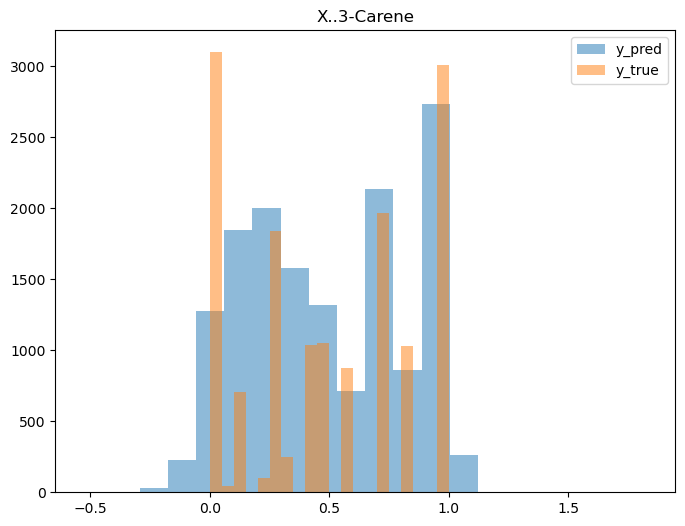

<Figure size 640x480 with 0 Axes>

In [50]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..3-Carene"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_tfidf_3car.png')

Pearson R

In [51]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.956
P-value: 0.000


<Axes: >

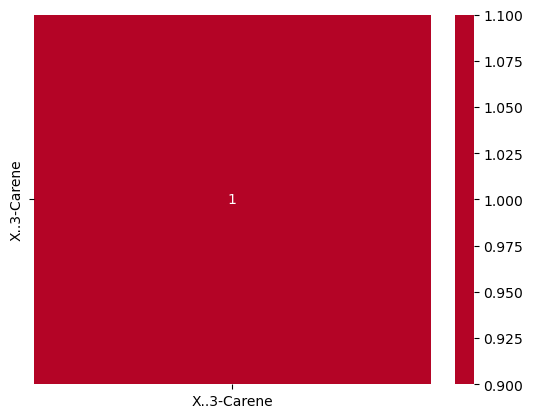

In [52]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)